## Чтение данных

In [1]:
import pandas as pd

In [2]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('content/dataset_1_lesson.csv')

In [4]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
# установим индекс на id для последуюего удобства
df.set_index('Id', inplace=True)

In [7]:
## Поиск нулевых значений в столбцах

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [9]:
# а если в процентах
df.isna().mean()

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [10]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Пройдемcя по нулевым значеняим:
- LotFrontage - Линейные футы улицы, примыкающей к участку - дом может не примыкать к улице. Проверяем эту гипотезу ниже сравнивая с данными LotConfig
- Alley - Проезд через участок. Нулевое поле просто обозначает что проезда нет.
- MasVnrType - тип каменной кладки. Ее может не быть, поэтому нулевые значения оправданы.
- MasVnrArea - площадь каменной кладки. Если кладки нет, то и площади нет. (ниже проверяем нет ли исключений что кладка есть, а площадь нулевая)
- BsmtQual,BsmtCond, BsmtExposure, BsmtExposure, BsmtFinType1,BsmtFinType2   данные подвала. Нет подвала нет и этих данных(ниже проверяем нет ли исключений т.е отсутствует что-то одно из данных (они или есть оба или обоих нет)
- FireplaceQu - качество камина. Нет камина нет качества. ниже проеряем коректность связи камина и качества
- Electrical - электрика. Возможно дом без электричества.
- GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond - данные по граражу. Нет гаража нет данных
- PoolQC - качество бассейна. Нет бассейна нет качества (ниже проверяем соответвие бассейнов)
- Fence - наличие забора (его может и не быть)
- MiscFeature - остальные данные (может и не быть)

## *Вывод: пропущенных данные - нет (LotConfig под вопросом).*

## Проверим LotConfig

In [11]:
# смотрим что у нас етсь в LotConfig
df['LotConfig'].unique()


array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [12]:
# Ищем пропуски/отсуцтвие значений
df.groupby('LotConfig')['LotFrontage'].apply(lambda x: x.isnull().sum())


LotConfig
Corner      62
CulDSac     49
FR2         14
FR3          0
Inside     134
Name: LotFrontage, dtype: int64

- Corner: 62 . Это угловые участки. Отсуствие границы с улицей вполне может быть.
- CulDSac: 49 Это тупики, поэтому аналогично.
- FR2: 14 Примыкание с 2 сторон. Тут не знаю.... спорно, но навреное допустимо.
- FR3: 0
- Inside: 134 Внутренние участки. Скорее всего тут как раз пропуски - пропущенные данные. 

## *Вывод: есть спорные внутренние участки (Inside: 134 Внутренние участки) Стоит рассмотреть необходимость заполнение их данными (например медианными)*

In [13]:
# Заполнение медианными данными (пока закоменчено)

# df['LotFrontage'] = df.groupby('LotConfig')['LotFrontage'].transform(
#     lambda x: x.fillna(x.median())
# )

## Проверка связей в данных (например качество бассейна не может быть при отсутсвии бассейна и т.д.)

In [14]:
mismatch = df[(df['PoolArea'] == 0) & (df['PoolQC'].notnull())]

if not mismatch.empty:
    print("Связь между 'PoolArea' и 'PoolQC' не корректна.")
    print(mismatch)
else:
    print("Связь между 'PoolArea' и 'PoolQC' корректна.")

Связь между 'PoolArea' и 'PoolQC' корректна.


In [15]:
mismatch = df[(df['GarageType'] == 0) & (df['GarageYrBlt'].notnull()) & (df['GarageFinish'].notnull()) & (df['GarageCars'].notnull()) & (df['GarageArea'].notnull()) & (df['GarageQual'].notnull()) & (df['GarageCond'].notnull())]

if not mismatch.empty:
    print("Связь между 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond' не корректна.")
    print(mismatch)
else:
    print("Связь между 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond' корректна.")

Связь между 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond' корректна.


In [16]:
mismatch = df[(df['Fireplaces'] == 0) & (df['FireplaceQu'].notnull())]

if not mismatch.empty:
    print("Связь между 'Fireplaces' и 'FireplaceQu' не корректна.")
    print(mismatch)
else:
    print("Связь между 'Fireplaces' и 'FireplaceQu' корректна.")

Связь между 'Fireplaces' и 'FireplaceQu' корректна.


In [17]:
# проверяем есть ли исключения по подвалу)
mismatch = df[(df['BsmtQual'] == 0) & (df['BsmtCond'].notnull()) & (df['BsmtExposure'].notnull()) & (df['BsmtFinType1'].notnull()) & (df['BsmtFinType2'].notnull())]

if not mismatch.empty:
    print("Связь между 'BsmtQual' и 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2' не корректна.")
    print(mismatch)
else:
    print("Связь между 'BsmtQual' и 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2' корректна.")
    


Связь между 'BsmtQual' и 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2' корректна.


In [18]:
# проверяем есть ли исключения по каменной кладке)
mismatch = df[(df['MasVnrArea'] == 0) & (df['MasVnrType'].notnull())]

if not mismatch.empty:
    print("Связь между 'MasVnrArea' и 'MasVnrType',  не корректна.")
    print(mismatch)
else:
    print("Связь между 'MasVnrArea' и 'MasVnrType',  корректна.")

Связь между 'MasVnrArea' и 'MasVnrType',  не корректна.
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
689           20       RL         60.0     8089   Pave   NaN      Reg   
1242          20       RL         83.0     9849   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                    ...                                     
689          HLS    AllPub    Inside  ...        0    NaN   NaN         NaN   
1242         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
689        0     10    2007       New        Partial     392000  
1242       0      6    2007       New        Partial     248328  

[2 rows x 80 columns]


In [19]:
df.loc[689, ['MasVnrArea', 'MasVnrType']]


MasVnrArea        0.0
MasVnrType    BrkFace
Name: 689, dtype: object

In [20]:
df.loc[1242, ['MasVnrArea', 'MasVnrType']]

MasVnrArea      0.0
MasVnrType    Stone
Name: 1242, dtype: object

## *Найдены две проблемы где есть тип облицовки а площадь нулевая*
Мы можем:
- Изменить тип облицовки на NAN т.е веротяность что именно тип указан ошибочно.
- Заполнить площадь по сдредним зачениям для таких домов/типов облицовки
- Удалить строки
Для проверки важности факторов создаим графики
   

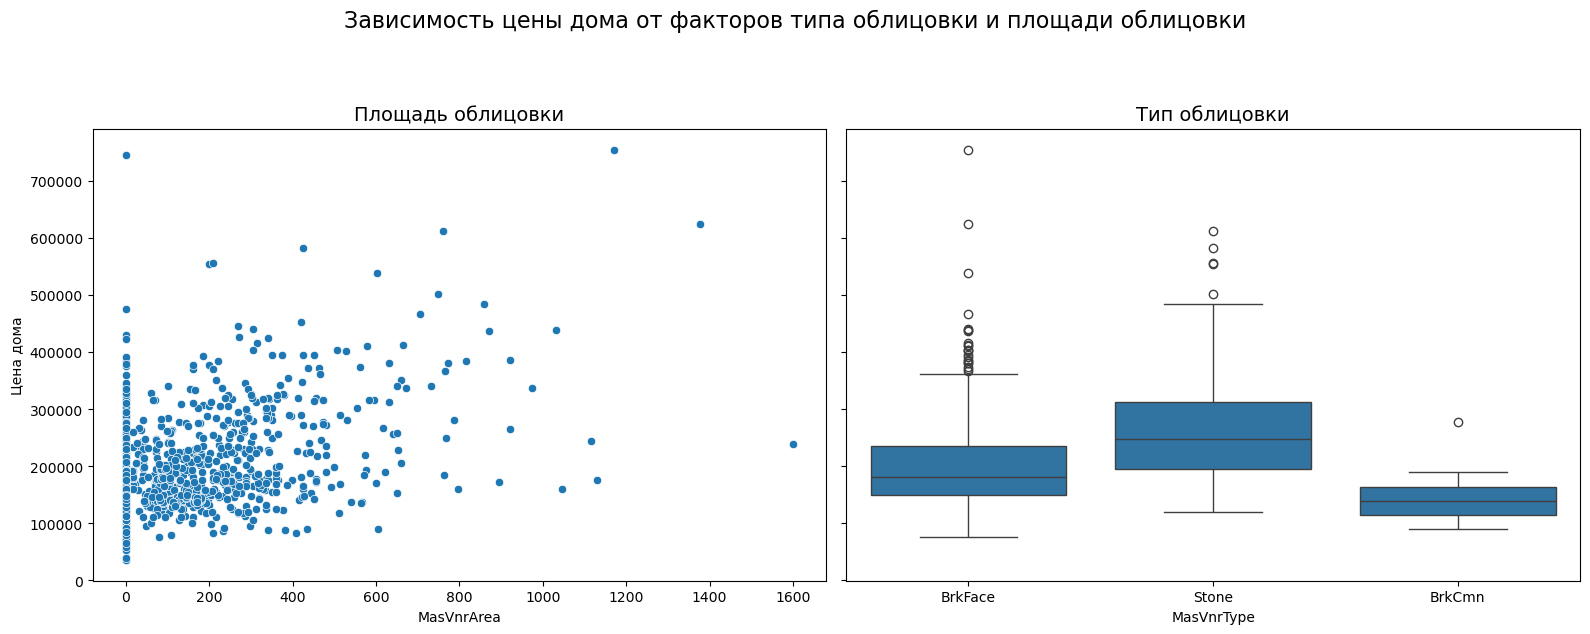

In [21]:
# Построение графиков

 
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Создаем 2 графика рядом

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Зависимость цены дома от факторов типа облицовки и площади облицовки', fontsize=16, y=1.05)

# График площади облицовки
sns.scatterplot(ax=axes[0], x=df['MasVnrArea'], y=df['SalePrice'])
axes[0].set_title('Площадь облицовки', fontsize=14)
axes[0].set_xlabel('MasVnrArea')
axes[0].set_ylabel('Цена дома')

# График для типа облицовки
sns.boxplot(ax=axes[1], x=df['MasVnrType'], y=df['SalePrice'])
axes[1].set_title('Тип облицовки', fontsize=14)
axes[1].set_xlabel('MasVnrType')
axes[1].set_ylabel('Цена дома')


# Упорядочиваем и показываем графики
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Отступ для общего заголовка
plt.show()

*По графику можно сделать вывод о том что тип облицовки не сильно влияет на цену (но много данных "вне усов" (на сколько их много трудно оценить по графику) надо проводить доп. исследования. По площади сказать по графику еще сложнее (так же нужны доп исследования). Вначале попробуем сводные таблицы *


In [22]:
# сводная таблица для категорийный данных (не требует ососбых действий)
df.groupby('MasVnrType', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
MasVnrType,,
BrkCmn,15,146318.066667
BrkFace,445,204691.871910
Stone,128,265583.625000
NaN,872,156958.243119


In [23]:
# сводная таблица для непрерывных данных ( требует предвариетльной разбивки на итервалы)
###dropna - показывает пустые значея.observed будут учитываться только те категории, которые реально присутствуют в данных, ###

df['MasVnrType_Group'] = pd.cut(df['MasVnrArea'], 5)

df.groupby('MasVnrType_Group', dropna=False, observed=True)['SalePrice'].agg(['count', 'mean'])

,count,mean
MasVnrType_Group,,
"(-1.6, 320.0]",1301,170587.909301
"(320.0, 640.0]",119,246941.428571
"(640.0, 960.0]",24,331601.750000
"(960.0, 1280.0]",6,351621.666667
"(1280.0, 1600.0]",2,432000.000000
NaN,8,236484.250000


*По площади данные свелись к 1 минимальному интервалу. Поэтому попробуем другую разбивку на интервалы .*

In [24]:
df['MasVnrType_Group_q'] = pd.qcut(df['MasVnrArea'], 5, duplicates='drop')  # duplicates=drop - удаляем повторные значения иначе может выбить ошибку при поытке создания

df.groupby('MasVnrType_Group_q', dropna=False, observed=True)['SalePrice'].agg(['count', 'mean'])

,count,mean
MasVnrType_Group_q,,
"(-0.001, 16.0]",872,156862.072248
"(16.0, 206.0]",290,188053.896552
"(206.0, 1600.0]",290,244599.017241
NaN,8,236484.250000


*Сводные таблицы так же не внесли ясности. На первый взгляд тип облицовки довольно сильно сказывается на цене. А по лозади все также не изветсные данные. Поэтому воспользуемся коррекляцией и тестом ANOVA*

In [25]:
# Для оценкци влияния площади облицовки воспользуемся оценкой корреляции Отбираем только числовые столбцы (иначе корреляцию сделать не получится, выдает ошибку по категорийным столбцам)
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Создаем корреляционную матрицу для всех числовых данных
correlation_matrix = numerical_df.corr()
# Выводим корреляцию между MasVnrArea и SalePrice
print(f"Корреляция между 'MasVnrArea' и 'SalePrice': {correlation_matrix.loc['MasVnrArea', 'SalePrice']}")


Корреляция между 'MasVnrArea' и 'SalePrice': 0.47749304709571444


*Согласно табличным данным - Корреляция 0.3 — 0.7: умеренная положительная связь (что означает, что при увеличении площади каменной кладки цена дома имеет тенденцию расти, но эта зависимость не является очень сильной.)*
Для оценкци влияния типа кладки воспользуемся тестом ANOVA


In [26]:
# для оценки зависимости для категорийныйх данных можно исползовать тест ANOVA
from scipy.stats import f_oneway

# Для каждой категории в MasVnrType проводим тест ANOVA
grouped = [df[df['MasVnrType'] == category]['SalePrice'] for category in df['MasVnrType'].dropna().unique()]
anova_result = f_oneway(*grouped)

print("ANOVA test result for MasVnrType and SalePrice:", anova_result)

ANOVA test result for MasVnrType and SalePrice: F_onewayResult(statistic=30.746118547408447, pvalue=2.0105801004591816e-13)


F-статистика 30 - что означает очень высокая , что указывает на существенные различия между типами облицовки и ценой домов.
p-value крайне низкое, что означает, что вероятность того, что эти различия произошли случайно, очень мала. Мы отвергаем нулевую гипотезу, т.е различия статистически значимы.
## *Вывод: ввиду того что по вычисленным данным тип облицовки статистичски важный для цены параметр то наилудшим вариантом будет  Изменить тип облицовки (для двух проблемых данных) на NAN т.е наиболее вероятно ошибочный выбор типа.*

In [27]:
# заменим некорректыне данные
df.loc[df['MasVnrArea'] == 0, 'MasVnrType'] = np.nan


In [28]:
# проверяем еще раз есть ли проблемы
mismatch = df[(df['MasVnrArea'] == 0) & (df['MasVnrType'].notnull())]

if not mismatch.empty:
    print("Связь между 'MasVnrArea' и 'MasVnrType',  не корректна.")
    print(mismatch)
else:
    print("Связь между 'MasVnrArea' и 'MasVnrType',  корректна.")

Связь между 'MasVnrArea' и 'MasVnrType',  корректна.


## * Вывод: Данные изменены корректно*

## Проверим данные на уникальность

In [29]:
for col in df.columns:
    unique_count = df[col].nunique()  # Получаем кол-вл уникальных значение для каждого столбца
    uniq_data = df[col].unique()  # Получаем массив уникальных значений для каждого столбца
    
    # Проверяем, все ли значения можно преобразовать в числа (чтобы отсеять поля типа id и вообще числа)
    is_numeric = pd.to_numeric(df[col], errors='coerce').notnull().all()
    
    if is_numeric:
        print(f"Столбец '{col}': уникальных значений {unique_count} - цифровые значения")
    else:
        print(f"Столбец '{col}': уникальных значений {unique_count} - {list(uniq_data[:5])}")

        

Столбец 'MSSubClass': уникальных значений 15 - цифровые значения
Столбец 'MSZoning': уникальных значений 5 - ['RL', 'RM', 'C (all)', 'FV', 'RH']
Столбец 'LotFrontage': уникальных значений 110 - [65.0, 80.0, 68.0, 60.0, 84.0]
Столбец 'LotArea': уникальных значений 1073 - цифровые значения
Столбец 'Street': уникальных значений 2 - ['Pave', 'Grvl']
Столбец 'Alley': уникальных значений 2 - [nan, 'Grvl', 'Pave']
Столбец 'LotShape': уникальных значений 4 - ['Reg', 'IR1', 'IR2', 'IR3']
Столбец 'LandContour': уникальных значений 4 - ['Lvl', 'Bnk', 'Low', 'HLS']
Столбец 'Utilities': уникальных значений 2 - ['AllPub', 'NoSeWa']
Столбец 'LotConfig': уникальных значений 5 - ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Столбец 'LandSlope': уникальных значений 3 - ['Gtl', 'Mod', 'Sev']
Столбец 'Neighborhood': уникальных значений 25 - ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel']
Столбец 'Condition1': уникальных значений 9 - ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe']
Столбец 'Condition2':

## *Вывод:Столбцов с не уникальными данными нет.*

## Вычисляем основные статистические показатели для числовых столбцов (распределение)

In [30]:
df.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
# отдельно проверим распределение для столбца цен
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*Данные имеют перекос т.к mean (среднее) = 180921, а 50% (медиана) = 163000. Т.е среднее больще медианы.  Поэтому можно попробовать проверить перекос* 

## Проверяем данные по цене на перекос(ассиметрию) (коэффициент ассиметрии)

In [32]:

skew(df['SalePrice'])


1.880940746034036

*Коэффициент ассиметрии сильно больше 1. Поэтому перекос значителен. И веротяно стоит применить логарифимеческое преобразование. Но в начале построим гистрограмму для проверки*

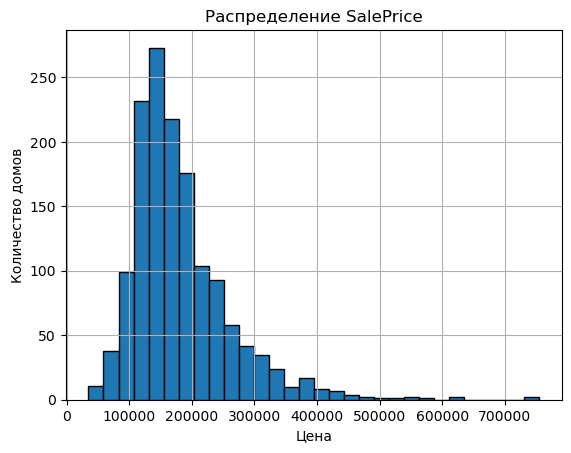

In [33]:
# построим гистограмму по сырым данным



df['SalePrice'].hist(bins=30, edgecolor='black')
plt.title('Распределение SalePrice')
plt.xlabel('Цена')
plt.ylabel('Количество домов')
plt.show() 

*Визуально перекос так же виден поэтому применяем логарифмическое преобразование  ( помогает уменьшить асимметрию) *

In [34]:
df['LogSalePrice'] = np.log(df['SalePrice'])
skew(df['LogSalePrice'])


0.1212103673013655

*Коэффициент ассиметрии существенно ниже 1. Чего мы и добивались*

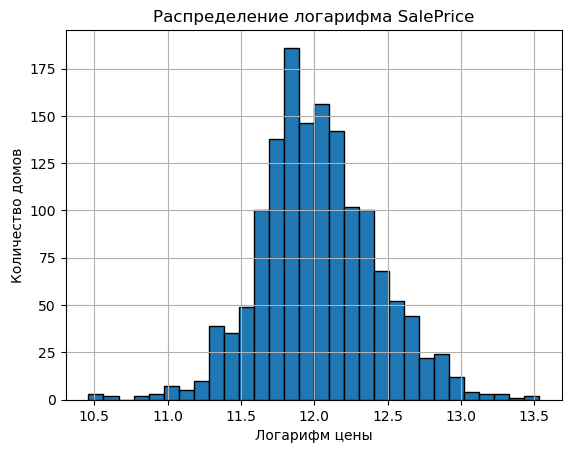

In [35]:
# построим гистограмму по преобразованны данным

df['LogSalePrice'].hist(bins=30, edgecolor='black')
plt.title('Распределение логарифма SalePrice')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество домов')
plt.show() 

*Визуально на графике также наблюдаем хорошее симметричное распределение*

## Построим остальные графики зависимости по отдельным столбцам

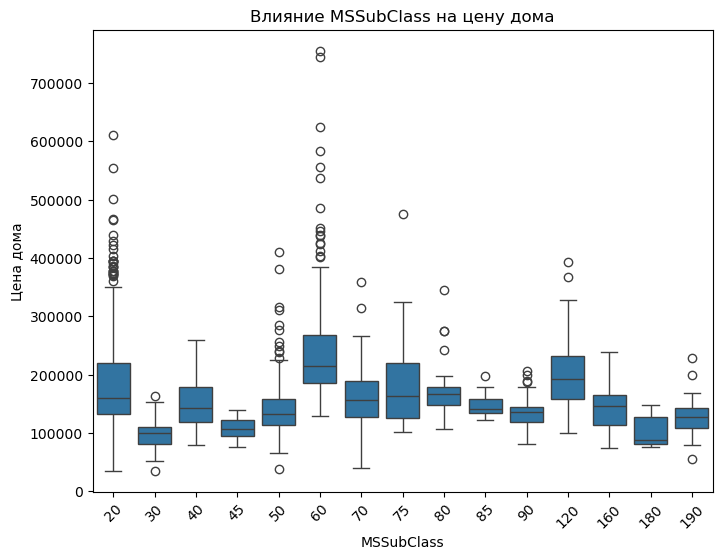

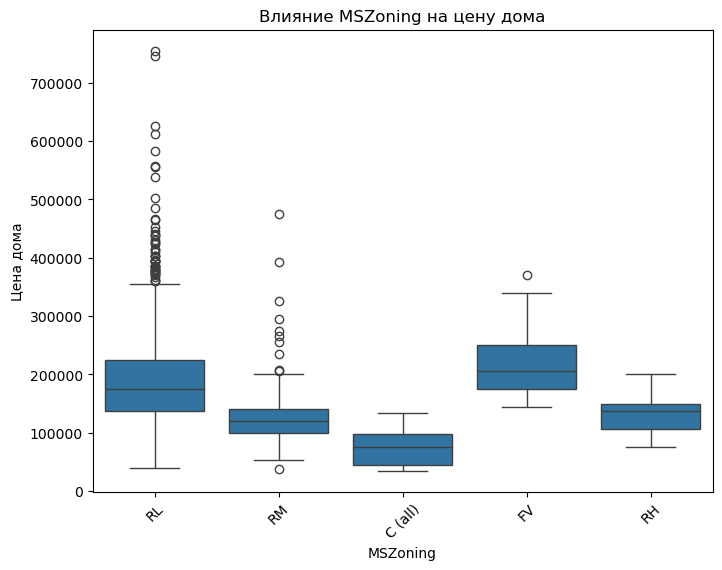

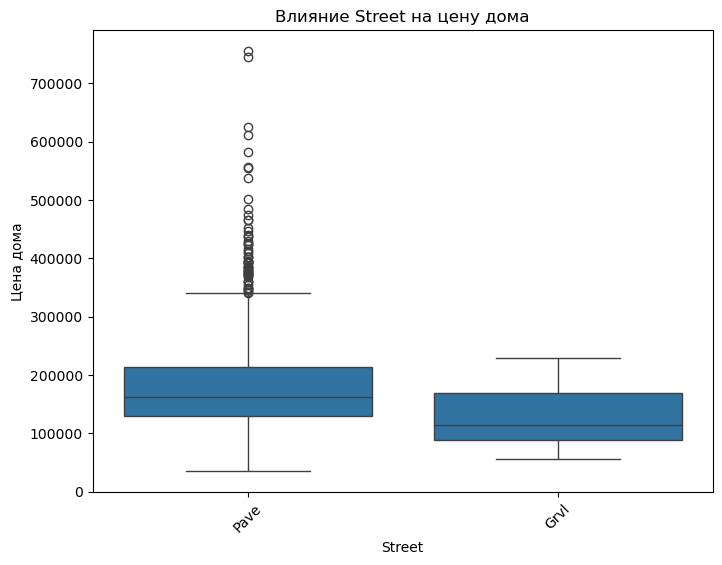

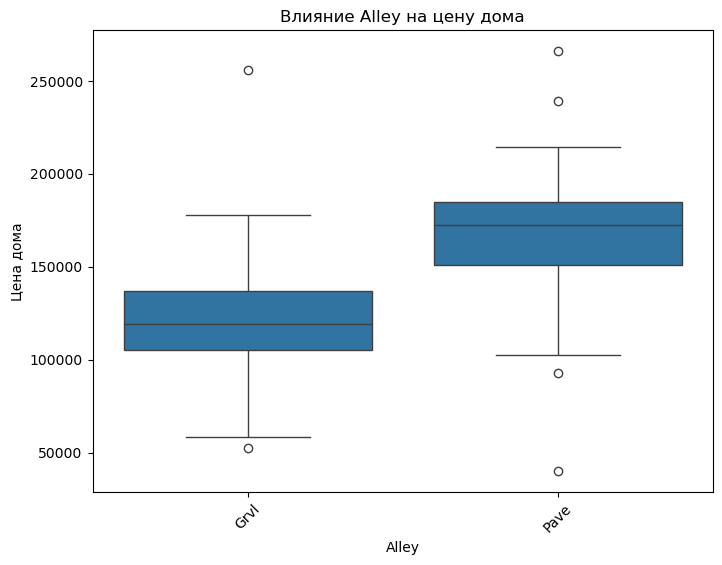

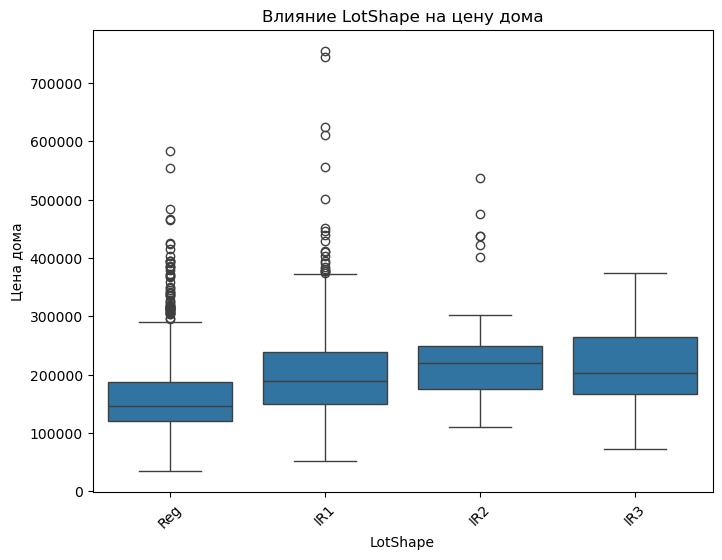

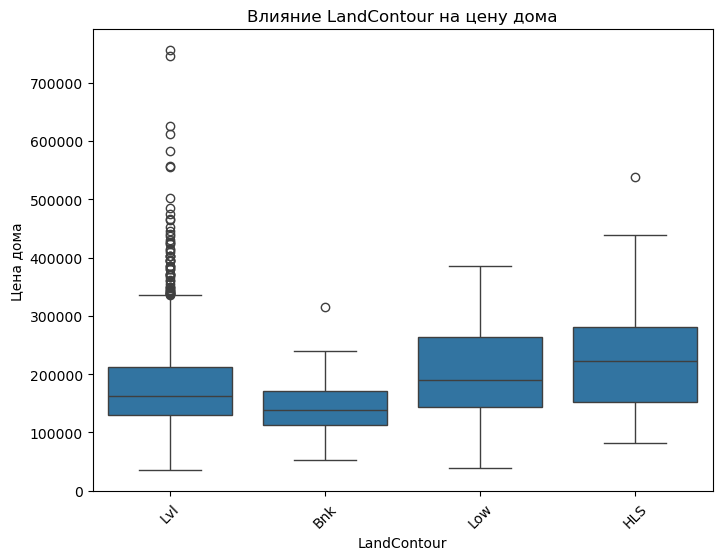

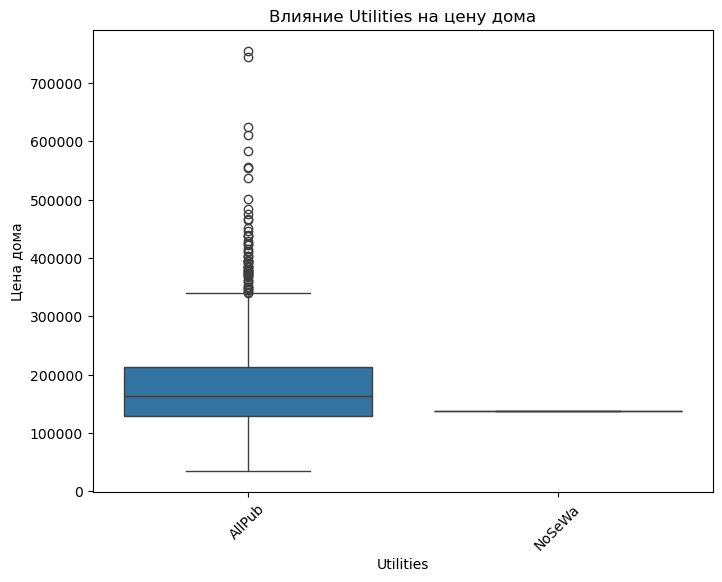

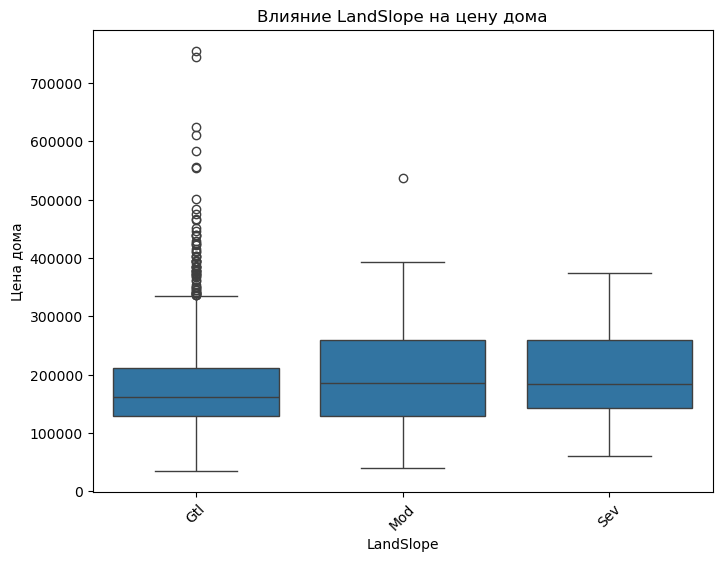

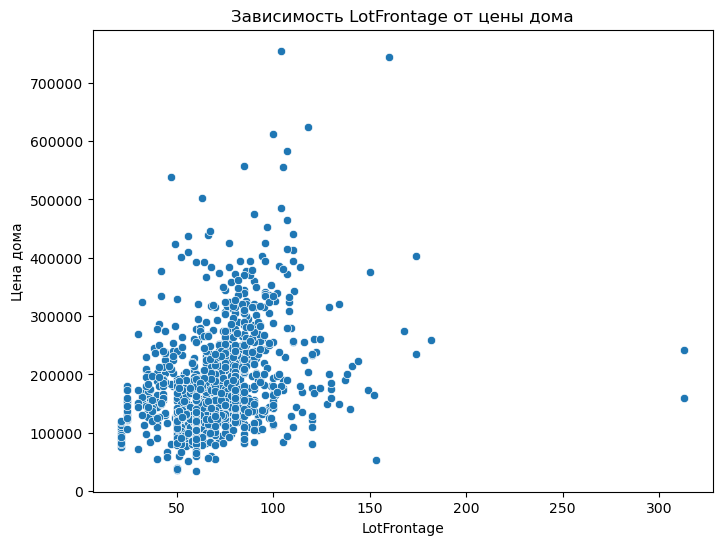

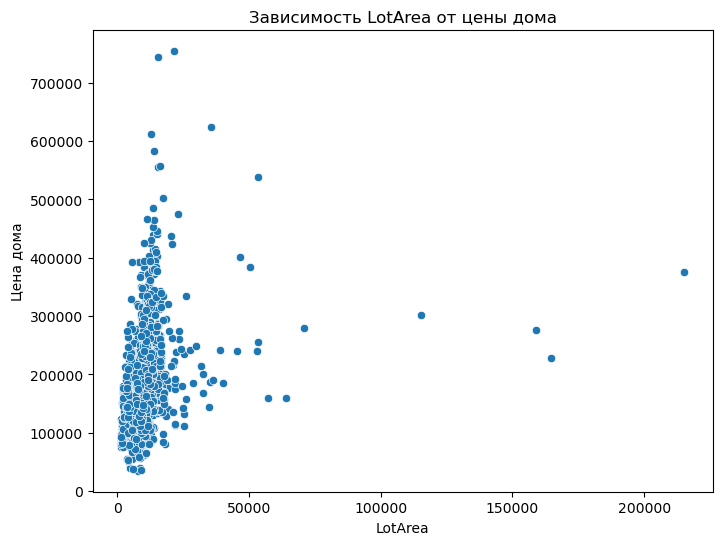

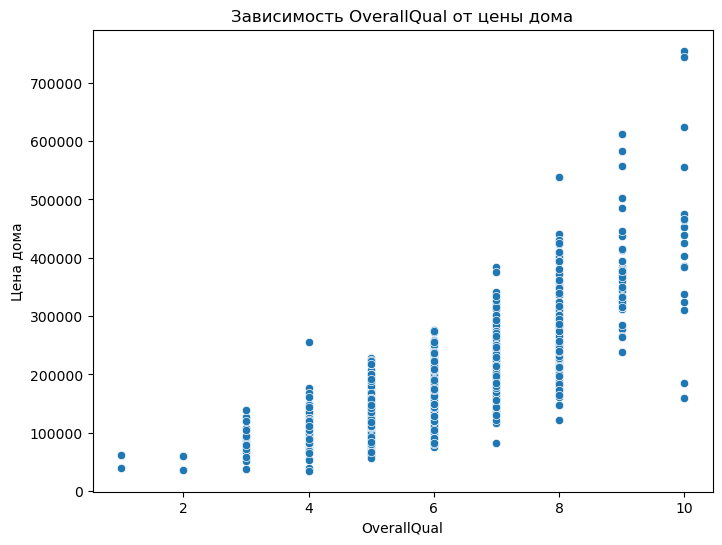

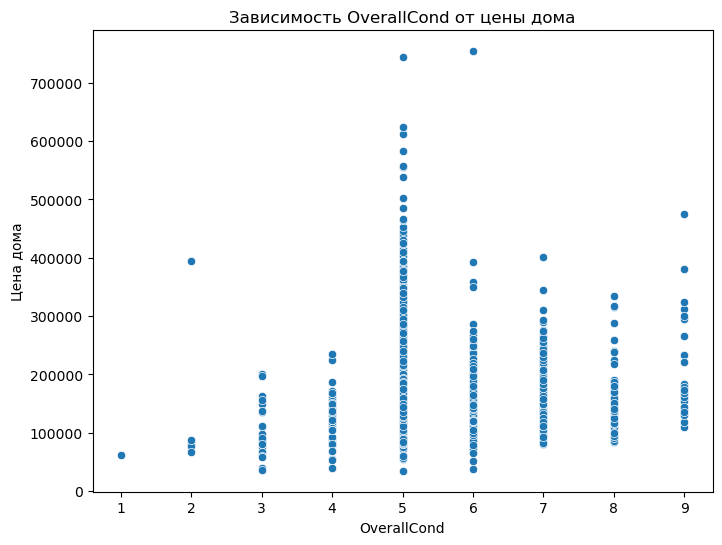

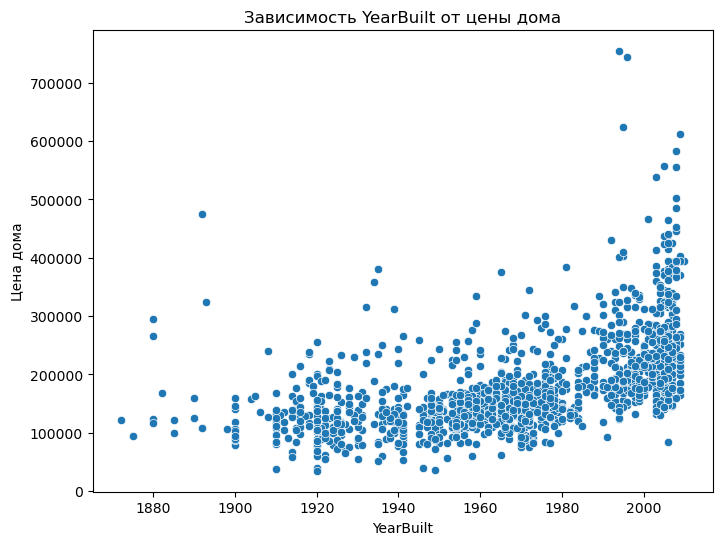

In [36]:


# Сделаем копии датафрейма для анализа разными методами
# Сохраняем копию оригинального датафрейма
original_df = df.copy()

# График для строчных(категорийных) данных
cat_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope']
for col in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'Влияние {col} на цену дома')
    plt.xticks(rotation=45)
    plt.ylabel('Цена дома')
    plt.show()

# График для числовых(непрерывных) данных
num_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'Зависимость {col} от цены дома')
    plt.xlabel(col)
    plt.ylabel('Цена дома')
    plt.show()

## Попробуем вычленить мусор/выбросы из данныех
*Вначале пройдемся по строчным/категорийным данным. Для этого создаим функцию для отбора мусора*

In [37]:
# Функция для обработки редких категорий
def handle_rare_categories(df, cat_columns, threshold):
    """categorical_columns - список столбцов для фильтрации, threshold - критерий фильтрации.
    (если данные в категории менее этого числа, мы их переносим в отдельно созданную категорию)"""
    for col in cat_columns:
        value = df[col].value_counts()  # считаем количество данных в каждой категории
        print(f"Количествo уникальных значений для {col}:")
        print(value)
        rare_categories = value[value < threshold].index  # выбираем редкие категории
        print(f"Редкие категории для {col}: {rare_categories}")
        df[col] = df[col].replace(rare_categories, 'Other')  # заменяем их на 'Other'
    return df


*Пробуем применить функцию к нашим столбцам*

In [38]:
df = handle_rare_categories(df, ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope'], 15)

Количествo уникальных значений для MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Редкие категории для MSZoning: Index(['C (all)'], dtype='object', name='MSZoning')
Количествo уникальных значений для Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Редкие категории для Street: Index(['Grvl'], dtype='object', name='Street')
Количествo уникальных значений для Alley:
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
Редкие категории для Alley: Index([], dtype='object', name='Alley')
Количествo уникальных значений для LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
Редкие категории для LotShape: Index(['IR3'], dtype='object', name='LotShape')
Количествo уникальных значений для LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Редкие категории для LandContour: Index([], dtype='object', name='LandContour'

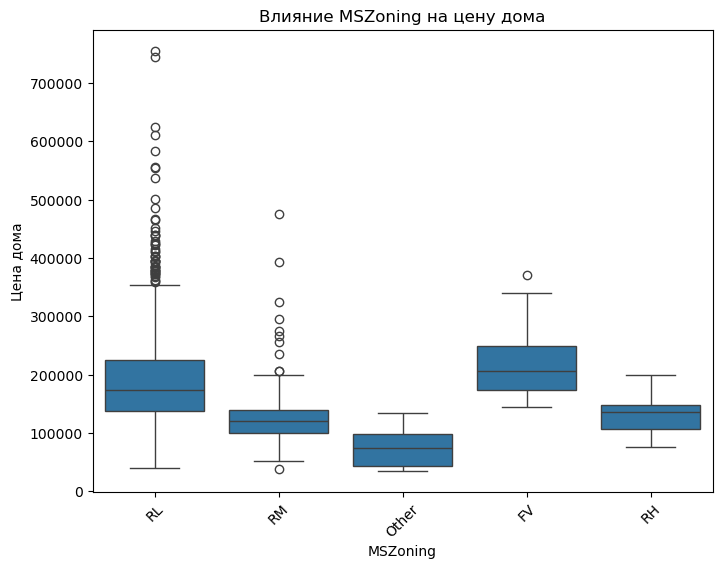

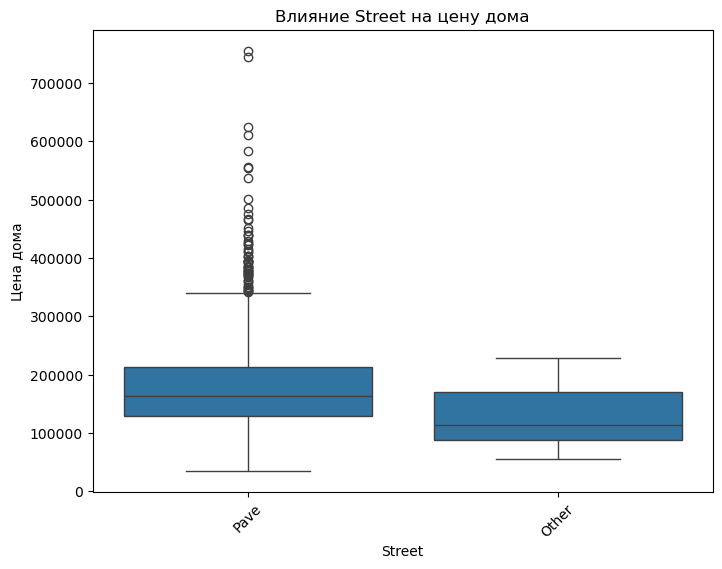

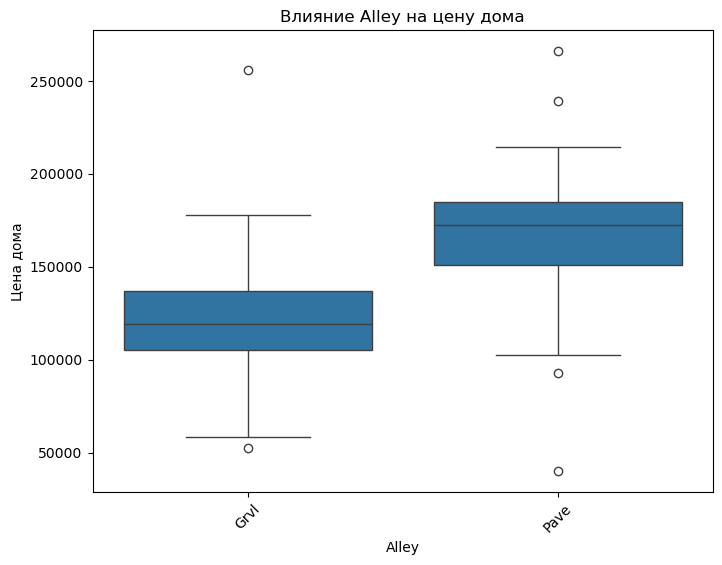

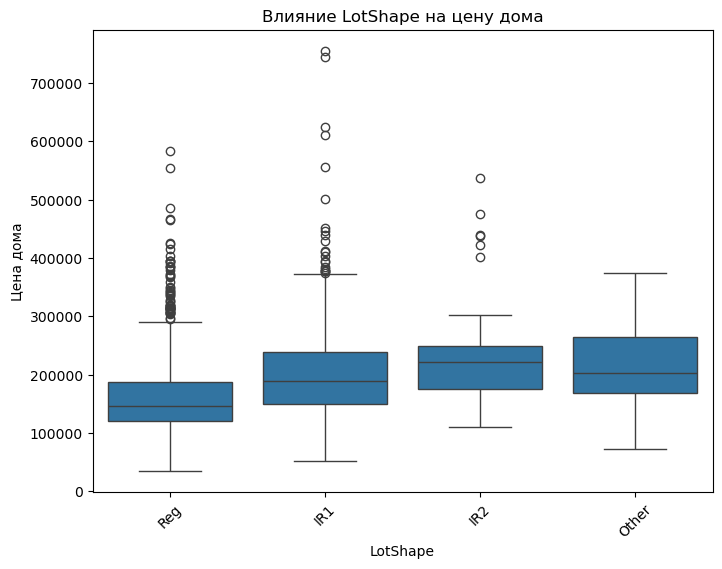

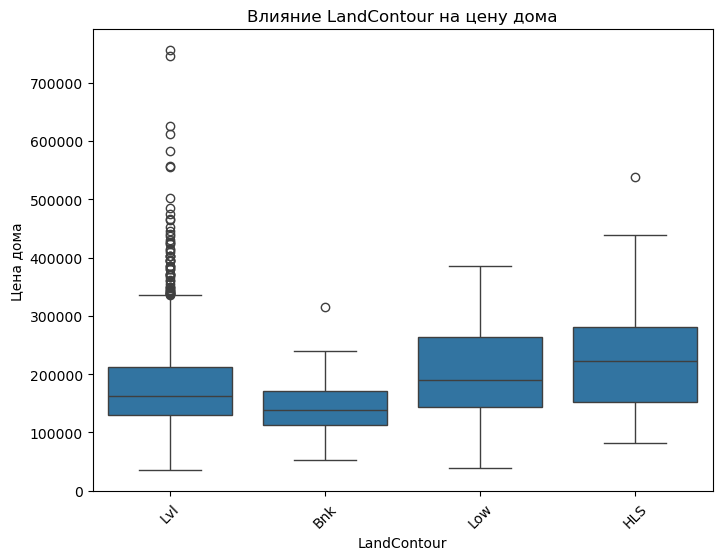

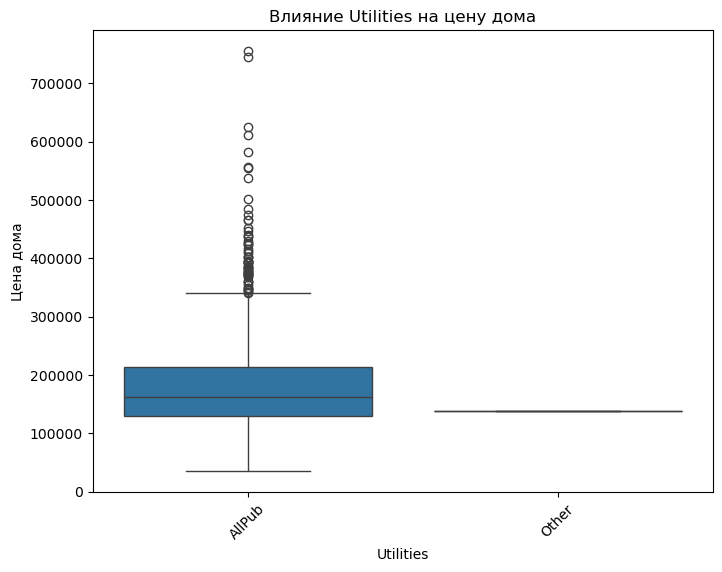

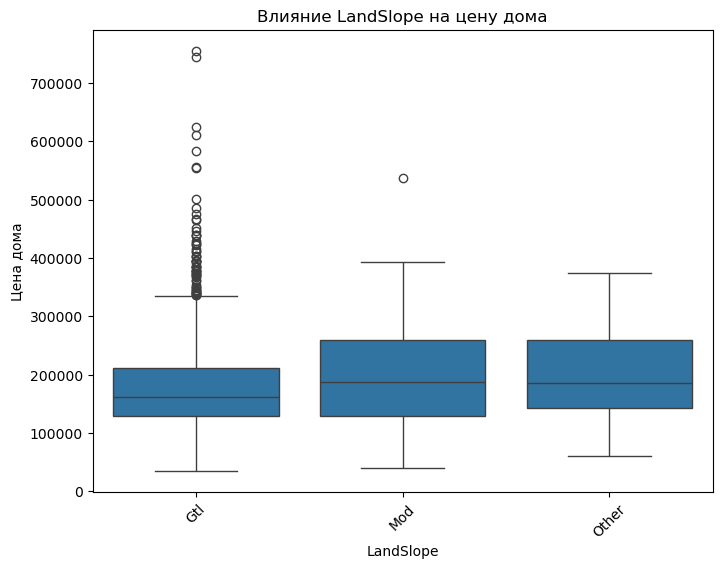

In [39]:
df['MSZoning'].unique()  # проверяем массив уникальных значений 

cat_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope']

# Построение boxplot для каждого столбца
for col in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'Влияние {col} на цену дома')
    plt.xticks(rotation=45)
    plt.ylabel('Цена дома')
    plt.show()

с

## *Вывод: Выбросов стало меньше.Если их все еще недостаточно нужно увеличить критерий отсева нащей функции (threshold)*

## Чистим выбросы у цифровых данных


*Для этого попробуем использовать два разных метода "Метод стандартного отклонения (STD)" и "Метод IQR (межквартильный размах) для определения оптимального*

In [40]:
# Функция для удаления выбросов с использованием стандартного отклонения
def remove_outliers_STD(df, numerical_columns):
    for col in numerical_columns:
        mean = df[col].mean()  # вычисляем среднее
        std = df[col].std()  # вычисляем стандартное отклонение
        threshold_upper = mean + 3 * std  # верхняя граница
        threshold_lower = mean - 3 * std  # нижняя граница
        df = df[(df[col] >= threshold_lower) & (df[col] <= threshold_upper)]  # удаляем выбросы
    return df

In [41]:
# Функция для удаления выбросов с использованием IQR
def remove_outliers_IQR(df, numerical_columns):
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)  # первый квартиль
        Q3 = df[col].quantile(0.75)  # третий квартиль
        IQR = Q3 - Q1  # межквартильный размах
        lower_bound = Q1 - 1.5 * IQR  # нижняя граница для выбросов
        upper_bound = Q3 + 1.5 * IQR  # верхняя граница для выбросов
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # удаляем выбросы
    return df


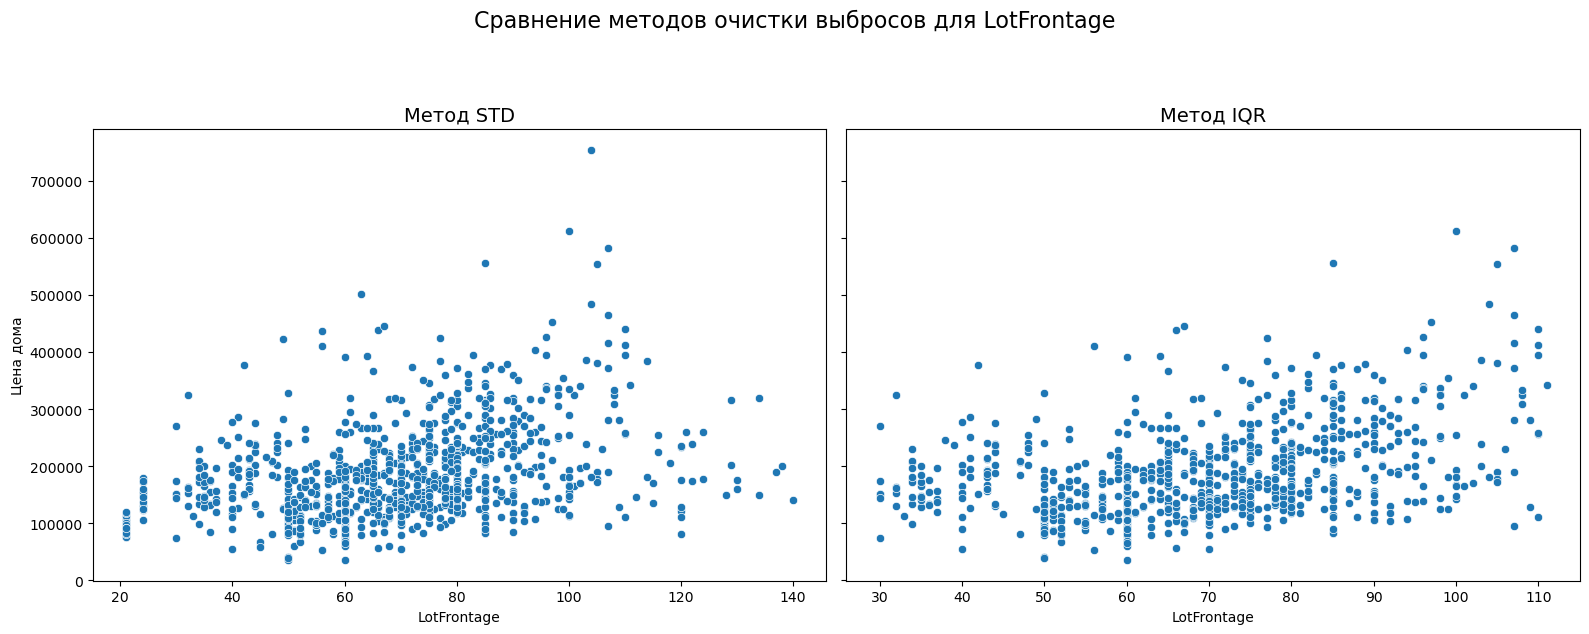

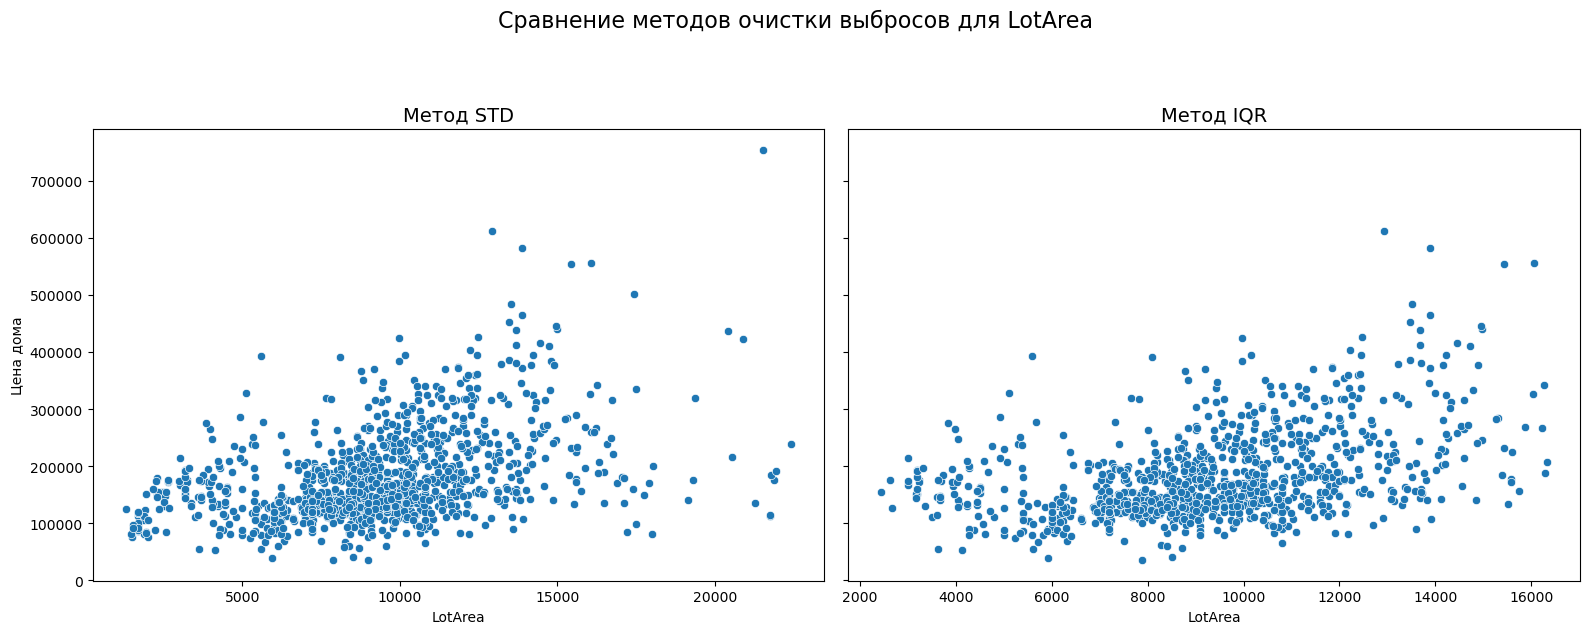

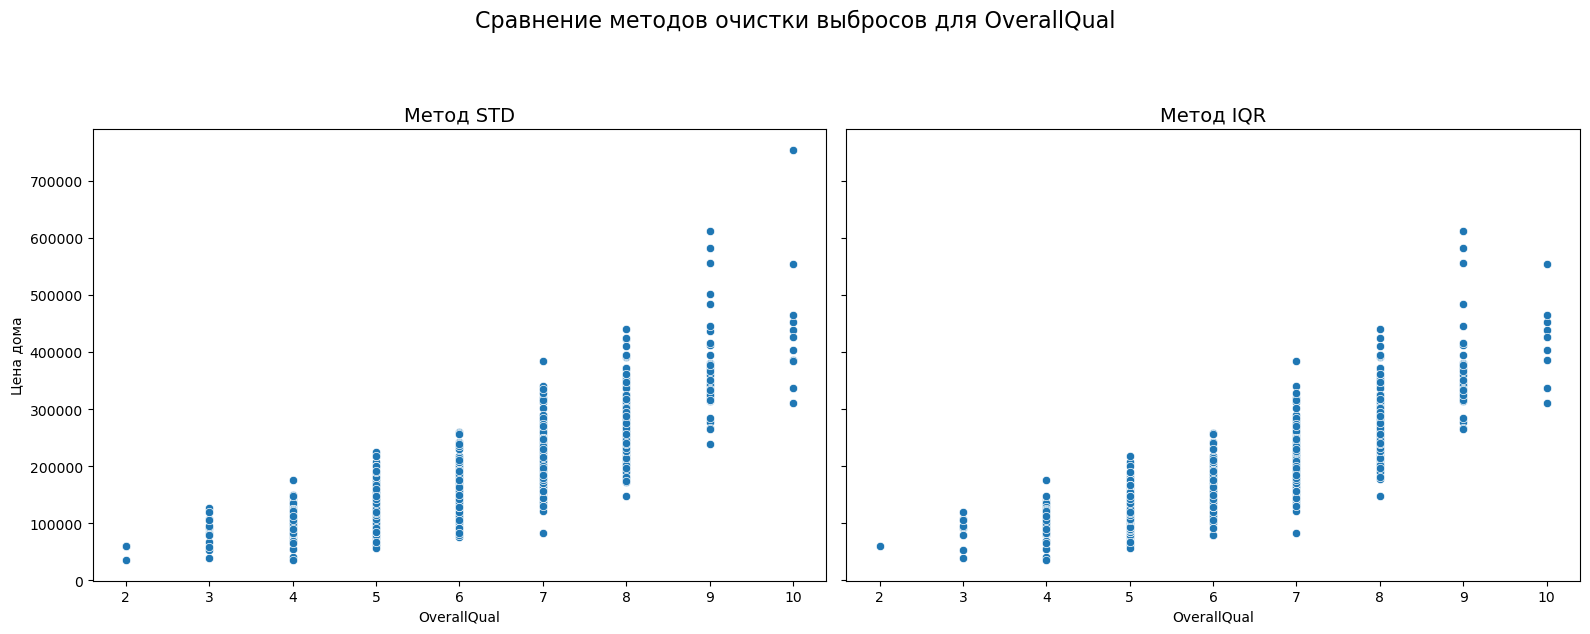

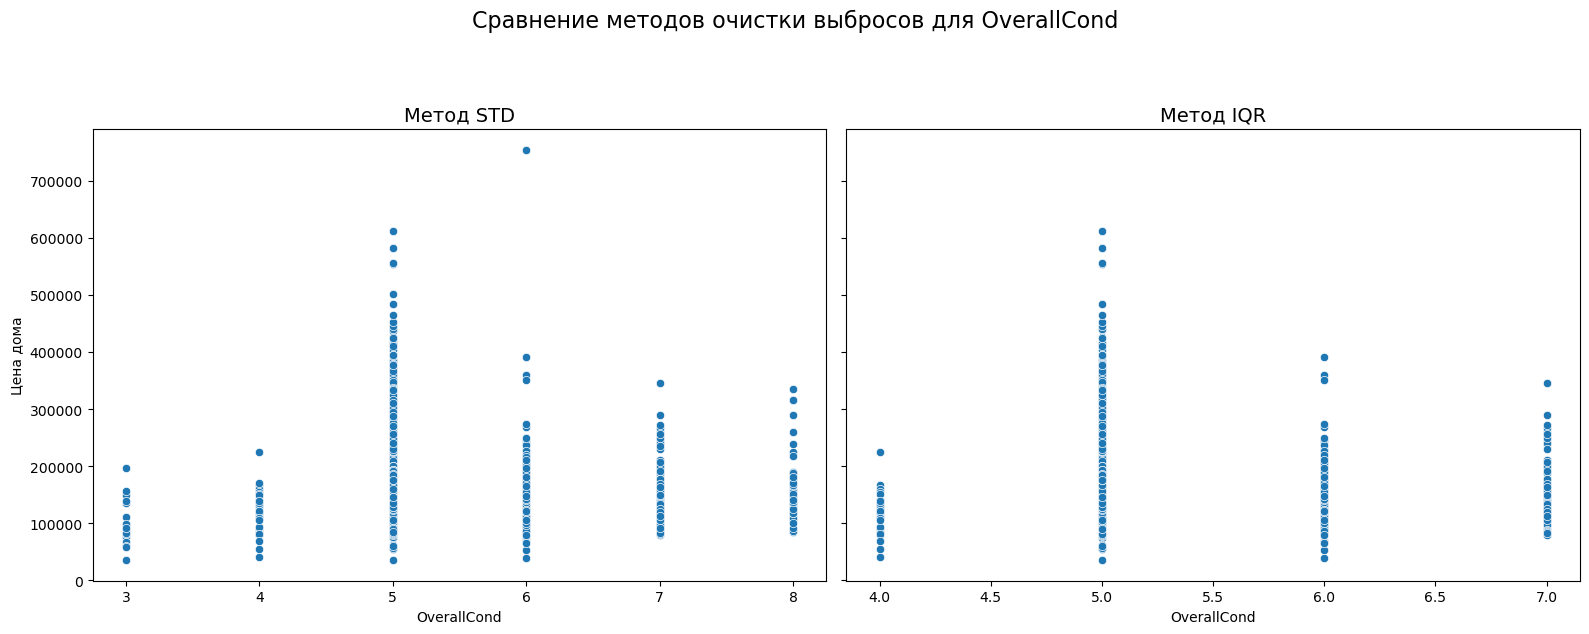

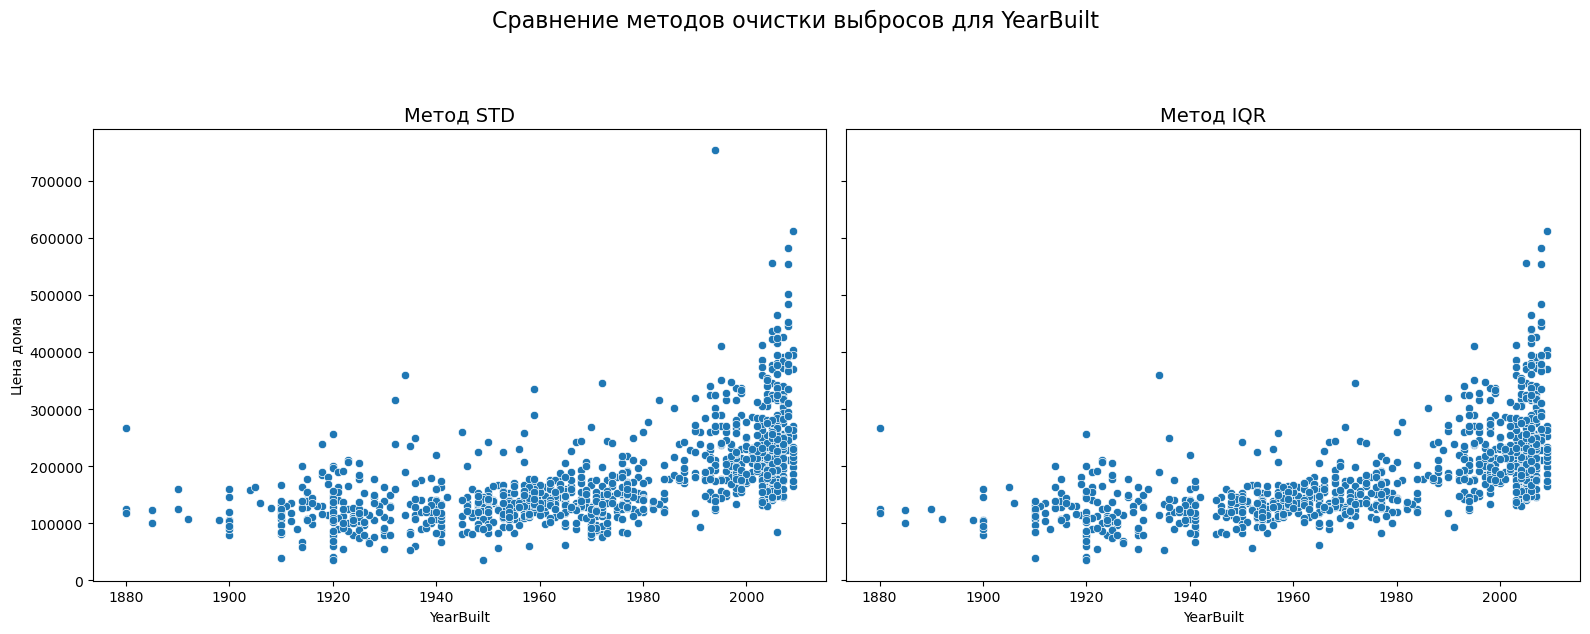

In [42]:
# Применим к числовым данным
numerical_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']

# Применение метода STD
df_std_filtered = remove_outliers_STD(original_df.copy(), numerical_columns)

# Применение метода IQR
df_iqr_filtered = remove_outliers_IQR(original_df.copy(), numerical_columns)

# Построение графиков
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Создаем 2 графика рядом
    
    # Добавляем общий заголовок для всего ряда графиков
    fig.suptitle(f'Сравнение методов очистки выбросов для {col}', fontsize=16, y=1.05)
    
    # График для метода STD
    sns.scatterplot(ax=axes[0], x=df_std_filtered[col], y=df_std_filtered['SalePrice'])
    axes[0].set_title('Метод STD', fontsize=14)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Цена дома')

    # График для метода IQR
    sns.scatterplot(ax=axes[1], x=df_iqr_filtered[col], y=df_iqr_filtered['SalePrice'])
    axes[1].set_title('Метод IQR', fontsize=14)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Цена дома')

    # Упорядочиваем и показываем графики
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Отступ для общего заголовка
    plt.show()

* Выбросов стало меньше, но они все еще присутсвуют на графиках*

## * Вывод:Метод IRQ лучше справился для всех данных*

In [43]:
# делаем бэкап датафрейма и затем записываем туда уже офильстрованные данные (методов IRQ)
backup_df = original_df.copy()

df = df_iqr_filtered.copy()


In [ ]:
# группировка
